In [11]:
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

iris = sns.load_dataset('iris')
X = iris.drop('species',axis=1)
y = iris['species']

#범주형 변수 숫자로 치환
classle = LabelEncoder()
y = classle.fit_transform(iris['species'].values)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=123, stratify=y)

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [12]:
from sklearn.svm import SVC

svm = SVC(kernel = 'linear', C=1.0, random_state=1)
svm.fit(X_train, y_train) # SVM추정
# train set의 y 예측치 구하기
y_train_pred = svm.predict(X_train)
# test set의 y 예측치 구하기
y_test_pred = svm.predict(X_test)

In [13]:
from sklearn import metrics

# train set의 accuracy ratio
metrics.accuracy_score(y_train, y_train_pred)

0.9904761904761905

In [14]:
# test set의 accuracy ratio
metrics.accuracy_score(y_test, y_test_pred)

0.9777777777777777

In [15]:
# confusion_matrix
metrics.confusion_matrix(y_test, y_test_pred)

array([[15,  0,  0],
       [ 0, 14,  1],
       [ 0,  0, 15]], dtype=int64)

In [16]:
from sklearn import metrics

# classification_report
print(metrics.classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      0.93      0.97        15
           2       0.94      1.00      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [21]:
from sklearn.datasets import fetch_lfw_people

faces = fetch_lfw_people(min_faces_per_person=70, resize=0.4)
n_samples, h, w = faces.images.shape
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Tony Blair']
(1288, 50, 37)


AttributeError: Axes.set() got an unexpected keyword argument 'sticks'

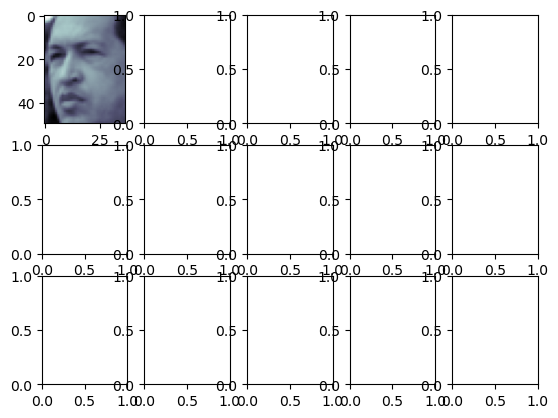

In [23]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(3,5)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(sticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])
    plt.suptitle('Faces')
    plt.show()

In [ ]:
import numpy as np

X = faces.data
print(X.shape)
n_features = X.shape[1]
y = faces.targets[0]
print(np.unique(y))
target_names = faces.target_names
print(target_names) # 얼굴이니식 Label 이름
n_classes = target_names.spape[0]
print(n_classes) # Label의 종류의 총갯수

NameError: name 'faces' is not defined

In [ ]:
# training set과 test set으로 데이터 나누기 --> 75:25의 비율
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
#주성분 분석을 이용해 150개의 특성변수에 대한 차원 축소
#Randomized PCA사용
from sklearn.decomposition import PCA

n_components = 150
pca = PCA(n_components=n_components,
    svd_solver='randomized', whiten=True).fit(X_train)
eigenfaces = pca.components_.reshaped(n_components, h, w)
X_train_pca = pca.transform(X_train) #주성분의 training data

X_test_pca = pca.transform(X_test) #주성분의 test data

ValueError: n_components=150 must be between 1 and min(n_samples, n_features)=4 with svd_solver='randomized'

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

#커널 SVM을 이용 & 커널함수:방사형기저함수(kernel='rbf')를 사용
#방사지저함수의 최적화 gamma와 완화변수의 허용정도 c를 찾기위해
# 'GridSearchCV' 모듈 사용
param_grid = {'C':[1e3, 5e3, 1e4, 5e4, 1e5],
              'gamma':[0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1]}
clf = GridSearchCV(SVC(kernel='rbf', class_weight = 'balanced'),
                   param_grid, cv=5)
clf.fit(X_train_pca, y_train)

NameError: name 'X_train_pca' is not defined

In [ ]:
# 학습된 결과를 시험데이터에 적용하여
# 정확도, recall, 그리고 f1을 제공하는 classification_report

y_fit = clf.predict(X_test_pca)

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print(classification_report(y_test,y_fit, target_names=target_names))
print(confusion_matrix(y_test, y_fit, labels=range(n_classes)))

NameError: name 'X_test_pca' is not defined